Saving 692cbfc6503c10120449.csv to 692cbfc6503c10120449 (6).csv
                     temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00            28.5                   85         24.5   
2017-01-02 01:00:00            28.4                   86         24.7   
2017-01-02 02:00:00            26.8                   91         24.5   
2017-01-02 03:00:00            27.4                   88         24.3   
2017-01-02 04:00:00            27.3                   88         24.1   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00           1.44            1.26                146   
2017-01-02 01:00:00           2.06            3.99                151   
2017-01-02 02:00:00           1.30            2.78                148   
2017-01-02 03:00:00           1.30            2.69         

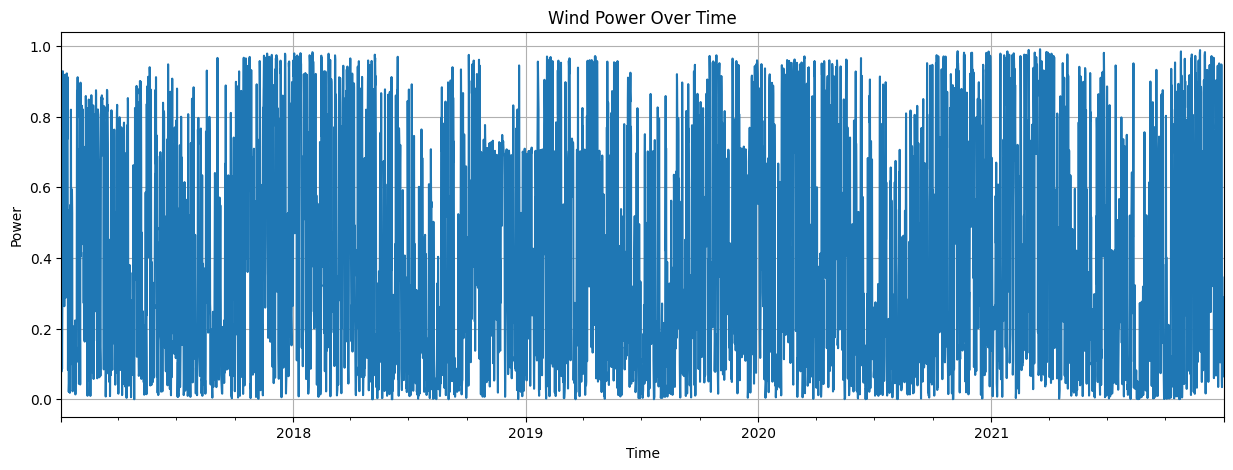

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0446 - mae: 0.1557 - val_loss: 0.0272 - val_mae: 0.1252
Epoch 2/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0264 - mae: 0.1249 - val_loss: 0.0277 - val_mae: 0.1272
Epoch 3/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0265 - mae: 0.1244 - val_loss: 0.0260 - val_mae: 0.1251
Epoch 4/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0260 - mae: 0.1236 - val_loss: 0.0267 - val_mae: 0.1277
Epoch 5/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0258 - mae: 0.1226 - val_loss: 0.0261 - val_mae: 0.1222
Epoch 6/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0249 - mae: 0.1202 - val_loss: 0.0260 - val_mae: 0.1252
Epoch 7/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0257 - mae: 0.1226 - val_loss: 0.0257 - val_mae: 0.1220
Epoch 8/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0256 - mae: 0.1218 - val_loss: 0.0262 - val_mae: 0.1222
Epoch 9/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss:

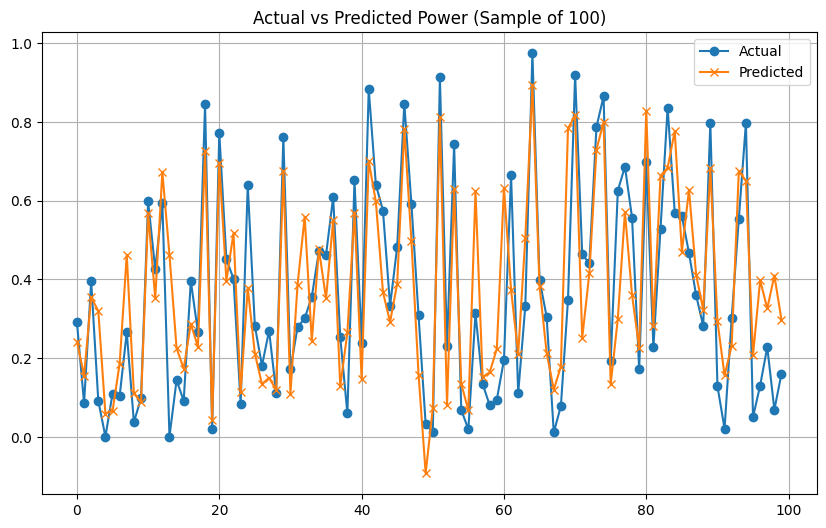

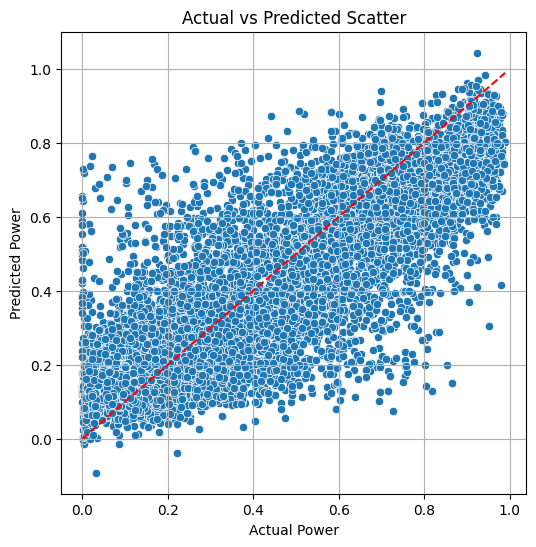

MAE: 0.12094022828972774
RMSE: 0.15855491004934277
R² Score: 0.6962065750024681


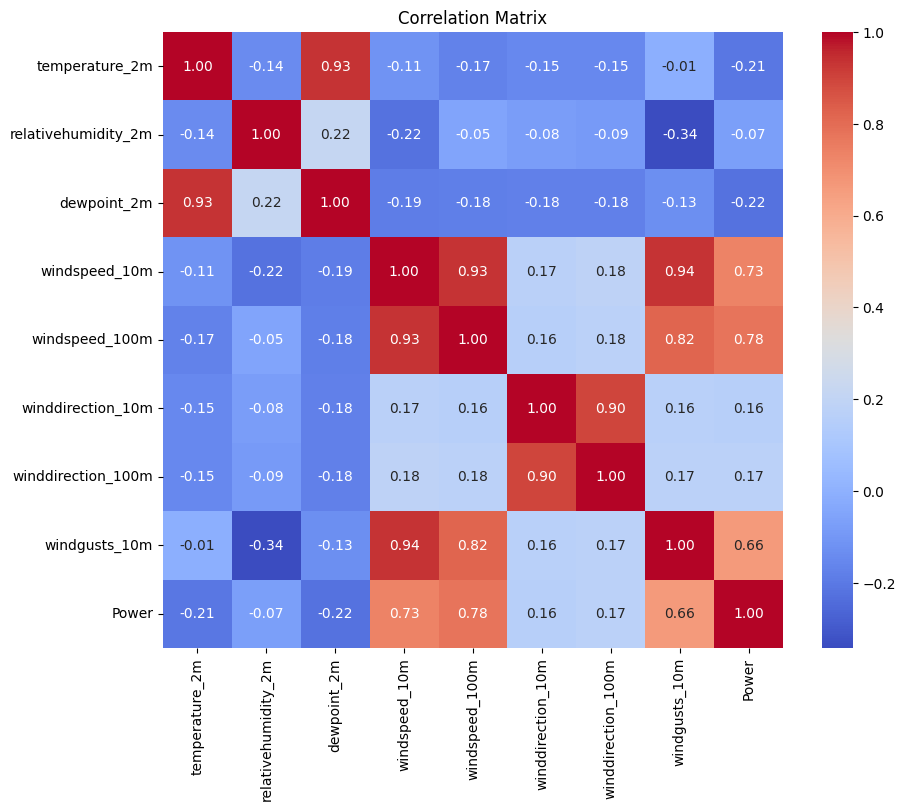

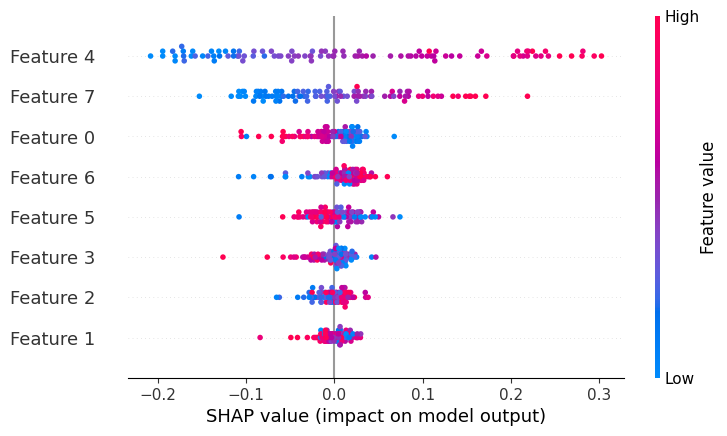

In [7]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the uploaded filename dynamically
filename = next(iter(uploaded))

# Load dataset
df = pd.read_csv(filename, parse_dates=['Time'])
df.set_index('Time', inplace=True)

# Check the first few rows
print(df.head())


# Check basic info
print(df.head())
print(df.describe())

# Optional: Plot Power over time
plt.figure(figsize=(15,5))
df['Power'].plot()
plt.title('Wind Power Over Time')
plt.ylabel('Power')
plt.grid(True)
plt.show()
# Drop rows with any missing values
df = df.dropna()

# Features and target
X = df.drop(columns=['Power'])
y = df['Power']

# Normalize (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)
# Predict
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Power (Sample of 100)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs Predicted Scatter')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:100])

shap.plots.beeswarm(shap_values)


In [8]:
# Combine y_test and predictions into a DataFrame
results = pd.DataFrame({
    'Actual Power': y_test.values,
    'Predicted Power': y_pred
})

# Display first 10 predictions
print(results.head(10))


   Actual Power  Predicted Power
0        0.2914         0.242381
1        0.0854         0.155886
2        0.3951         0.354883
3        0.0917         0.319851
4        0.0007         0.059341
5        0.1099         0.066032
6        0.1041         0.186229
7        0.2661         0.462593
8        0.0376         0.110858
9        0.0978         0.088198



🔍 Best Predictions:
      Actual Power  Predicted Power     Error
1356        0.2711         0.271069  0.000031
3022        0.4945         0.494459  0.000041
7754        0.4708         0.470871  0.000071
1693        0.6292         0.629325  0.000125
2766        0.8285         0.828644  0.000144
8728        0.1103         0.110451  0.000151
4149        0.0574         0.057248  0.000152
2869        0.6206         0.620430  0.000170
8023        0.1873         0.187098  0.000202
752         0.1212         0.120956  0.000244

⚠️ Worst Predictions:
      Actual Power  Predicted Power     Error
7299        0.0231         0.764850  0.741750
3541        0.0006         0.729596  0.728996
5308        0.0175         0.738572  0.721072
6014        0.8653         0.151056  0.714244
3063        0.0041         0.717845  0.713745
2268        0.8171         0.128244  0.688856
6428        0.0694         0.733472  0.664072
3869        0.8046         0.142180  0.662420
307         0.0000         0.656816 

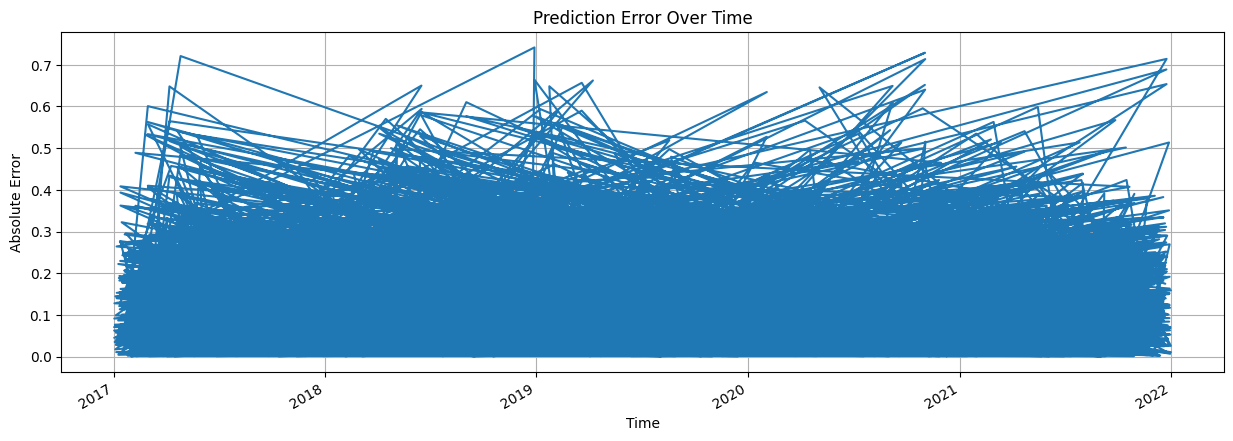

In [9]:
# Create DataFrame of actual, predicted, and error
results = pd.DataFrame({
    'Actual Power': y_test.values,
    'Predicted Power': y_pred,
})
results['Error'] = np.abs(results['Actual Power'] - results['Predicted Power'])

# Best predictions (smallest error)
print("\n🔍 Best Predictions:")
print(results.sort_values(by='Error').head(10))

# Worst predictions (largest error)
print("\n⚠️ Worst Predictions:")
print(results.sort_values(by='Error', ascending=False).head(10))
# Add time back to the results
# Reset index to get 'Time' back if needed
y_test_with_time = y_test.copy()
y_test_with_time = y_test_with_time.reset_index()  # if y_test was a series with datetime index

# Add time to the results
results['Time'] = y_test_with_time['Time']
results.set_index('Time', inplace=True)

# Plot prediction error over time
plt.figure(figsize=(15,5))
results['Error'].plot()
plt.title("Prediction Error Over Time")
plt.ylabel("Absolute Error")
plt.xlabel("Time")
plt.grid(True)
plt.show()


In [10]:
# Feature engineering from datetime
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['Power_lag1'] = df['Power'].shift(1)
df = df.dropna()
# Reshape for LSTM: (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_scaled.shape[1])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_lstm, y, epochs=50, batch_size=32)
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1369/1369 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0488 - mae: 0.1616
Epoch 2/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0271 - mae: 0.1254
Epoch 3/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0266 - mae: 0.1245
Epoch 4/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0261 - mae: 0.1232
Epoch 5/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0259 - mae: 0.1228
Epoch 6/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0256 - mae: 0.1225
Epoch 7/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0260 - mae: 0.1229
Epoch 8/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0254 - mae: 0.1214
Epoch 9/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0257 - mae: 0.1223
Epoch 10/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0255 - mae: 0.1220
Epoch 11/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0252 - mae: 0.1209
Epoch 12/50
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0255 - mae: 0.1213
Epoch 13/50

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
def predict_power(weather_dict, scaler, model, original_features):


    # Create a DataFrame with only the original features
    df = pd.DataFrame([weather_dict])[original_features]
    scaled = scaler.transform(df)
    prediction = model.predict(scaled)[0]  # Removed extra [0]
    return prediction

# Get the original features from the DataFrame used for training
original_features = X.columns.tolist()

# Now pass in the actual weather input
my_weather = {
    'temperature_2m': 30.2,
    'relativehumidity_2m': 88,
    'dewpoint_2m': 27,
    'windspeed_10m': 3.54,
    'windspeed_100m': 6.89,
    'winddirection_10m': 74,
    'winddirection_100m': 81,
    'windgusts_10m': 5.8,
    'hour': 8,  # This and the following two features are now included
    'dayofweek': 0,
    'month': 1
}

pred = predict_power(my_weather, scaler, model, original_features)  # Pass original_features
print(f"🔋 Predicted Power Output: {pred:.4f}")

🔋 Predicted Power Output: 0.2734
